## Import modules

In [5]:
import numpy as np
import pandas as pd
import talib
import matplotlib.pyplot as plt
import signal_analysis as sig
%matplotlib inline

## Define Functions

In [6]:
def find_extrema(df):
    close = np.array(df['close'])
    loc_max, loc_min = sig.find_local_extrema(close)
    return loc_max, loc_min

In [193]:
def get_data(filename, index_col, close_col):
    
    #import data from csv file
    dates = np.genfromtxt(filename, delimiter=',', dtype='str', skip_header=1, usecols=(index_col), unpack=True)
    close = np.genfromtxt(filename, delimiter=',', dtype='float', skip_header=1, usecols=(close_col), unpack=True)
    
    #data frame column names
    columns = ['close', 'rsi (14)', 'macd', 'macd signal', 'bol_upper (20)', 'bol_lower (20)', 'sma50', 'sma100', 'sma200']
    
    #create empy data frame, fill nans with 0
    df = pd.DataFrame(index=dates, columns=columns)
    df = df.fillna(0)
    
    rsi14 = talib.RSI(close, timeperiod=14)
    macd, macd_signal, macd_hist = talib.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)
    upper_bol, middle_bol, lower_bol = talib.BBANDS(close, timeperiod=20)
    
    
    sma50  = talib.MA(close, timeperiod=50)
    sma100 = talib.MA(close, timeperiod=100)
    sma200 = talib.MA(close, timeperiod=200)
    
    df['close']            = close
    df['rsi (14)']         = rsi14
    #normalize macd and macd signal
    df['macd']             = macd
    df['macd signal']      = macd_signal
    df['bol_upper (20)']   = upper_bol
    df['bol_lower (20)']   = lower_bol
    df['sma50']            = sma50
    df['sma100']           = sma100
    df['sma200']           = sma200
    
    df = df.fillna(method='backfill')
    
    loc_max, loc_min = find_extrema(df)
    
    min_df = df.iloc[loc_min]
    max_df = df.iloc[loc_max]
    
    min_df['Y'] = 1
    max_df['Y'] = 0
    
    extrema = min_df.append(max_df)
    extrema = extrema.sort_index()
    
    extrema_filename = filename[5:len(filename)-4]+'_extrema.csv'
    extrema.to_csv(extrema_filename, sep=',')
    
    plt.figure(figsize=(15,7))
    plt.plot(range(len(df['close'])),df['close'])
    for i in range(len(loc_max)):
        plt.axvline(loc_max[i], color='k')
    for i in range(len(loc_min)):
        plt.axvline(loc_min[i], color='r')
    plt.show()
    
    return extrema

## Create data frame

/root/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/root/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


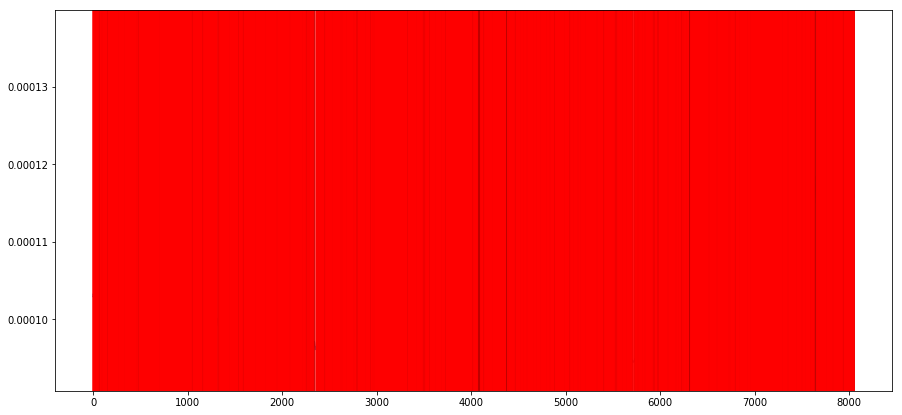

In [198]:
btc_df = get_data('data/XRPBTC_1min_7days_binance_data_021018.txt',1,5)

## Plot prices, find max/min

In [9]:
loc_max, loc_min = find_extrema(xrp_df)

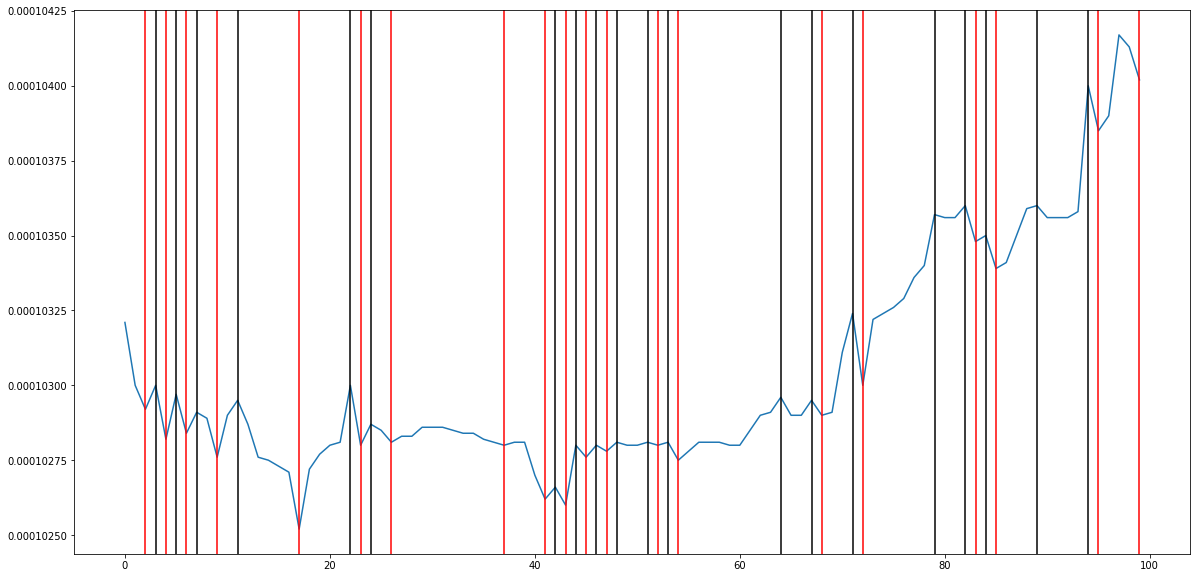

In [10]:
plt.figure(figsize=(20,10))
plt.plot(range(len(xrp_df['close'][0:100])),xrp_df['close'][0:100])
#plt.plot(range(len(xrp_df['close'][0:100])),xrp_df['sma50'][0:100])
for i in range(20):
    plt.axvline(loc_max[i], color='k')
    plt.axvline(loc_min[i], color='r')
#plt.savefig('max_min.pdf')
plt.show()

## Do this again, with different data

In [18]:
get_data('data/BTCUSDT_daily.csv', 1, 5)

,close,rsi (14),macd,macd signal,bol_upper (20),bol_lower (20),sma50,sma100,sma200
Wed Aug 16 20:00:00 2017,4285.08,67.858274,-117.398092,-51.421239,4779.438279,3877.639721,4159.1842,5270.6666,NaN
Thu Aug 17 20:00:00 2017,4108.37,67.858274,-117.398092,-51.421239,4779.438279,3877.639721,4159.1842,5270.6666,NaN
Fri Aug 18 20:00:00 2017,4139.98,67.858274,-117.398092,-51.421239,4779.438279,3877.639721,4159.1842,5270.6666,NaN
Sat Aug 19 20:00:00 2017,4086.29,67.858274,-117.398092,-51.421239,4779.438279,3877.639721,4159.1842,5270.6666,NaN
Sun Aug 20 20:00:00 2017,4016.00,67.858274,-117.398092,-51.421239,4779.438279,3877.639721,4159.1842,5270.6666,NaN
Mon Aug 21 20:00:00 2017,4040.00,67.858274,-117.398092,-51.421239,4779.438279,3877.639721,4159.1842,5270.6666,NaN
Tue Aug 22 20:00:00 2017,4114.01,67.858274,-117.398092,-51.421239,4779.438279,3877.639721,4159.1842,5270.6666,NaN
Wed Aug 23 20:00:00 2017,4316.01,67.858274,-117.398092,-51.421239,4779.438279,3877.639721,4159.1842,5270.6666,NaN
Thu Aug 24 20:00:00 2017,4280.68,67.858274,-117.398092,-51.421239,4779.438279,3877.639721,4159.1842,5270.6666,NaN
Fri Aug 25 20:00:00 2017,4337.44,67.858274,-117.398092,-51.421239,4779.438279,3877.639721,4159.1842,5270.6666,NaN
